# 台灣升大學考試國寫情意題佳作詞頻相關研究

+ 第三組 想不到組名
+ 組員：盧德原、朱修平、楊舒晴、陳宛瑩

## Python Project

In [1]:
import numpy as np
import pandas as pd
import gdown
import os
import re
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

import torch
import transformers

import CwnSenseTagger
#CwnSenseTagger.download()

import CwnGraph
#CwnGraph.download()

from CwnGraph import CwnBase
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

#import DistilTag
#DistilTag.download()

In [2]:
ws = WS(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + '/data')
pos = POS(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + '/data')
ner = NER(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)) + '/data')

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


### 讀取與整理資料集

In [3]:
all_f = []

for file in os.listdir("data_set/"):
    if file.endswith(".txt"): all_f.append(file)

'''
print("list length = ", len(all_f))
print(all_f[2])
print(len(all_f[2]))
'''

'\nprint("list length = ", len(all_f))\nprint(all_f[2])\nprint(len(all_f[2]))\n'

In [4]:
sentence_list = []
sentence_list_type = []
sentence_list_year = []

for i in all_f:
    f = open("data_set/" + i)
    sentence_list.append(f.read())
    
    if "GSAT" in i:
        sentence_list_type.append("GSAT")
    else:
        sentence_list_type.append("AST")
        
    year = re.search("\_(...|..)\_", i).group(1)
    sentence_list_year.append(year)
    
all_list = pd.DataFrame({'type': sentence_list_type, 'year': sentence_list_year, 'sentence': sentence_list})
all_list

,type,year,sentence
0,GSAT,105,這時，人也只能笑了。\n蘇迪勒的狂風橫掃全臺，它破壞了，也創造了。臺北市的兩個郵筒在一夜肆虐...
1,GSAT,107,秋天總給人一種蕭瑟之感，但我卻對秋天情有獨鍾。\n秋風颯颯，捲起了千堆落葉，也捲起了眾多遷客...
2,AST,101,它，蜿蜒過土壤的縫隙；它，寄身於大海的湛藍。它，摒持著儒者「原泉滾滾，不含晝夜。」的精神奔流...
3,GSAT,101,人生是一條長河，唯有堅硬的卵石才能激盪出美麗的水花，也唯有一份鍥而不舍的真情才能拓展生命的寬...
4,AST,103,最貧窮的人不是沒有錢財，而是沒有夢想。有了夢想就像是有了羅盤的航行；就像是有了心中的羅馬，只...
...,...,...,...
203,GSAT,110,如果我有一座新冰箱，那想必是清新可人，條理分明。因為冰藏在其間的，不僅是食物本身，更蘊含背後...
204,AST,101,人總免不了自己一個人的。有人怕寂寞，說：「寂寞，難耐。」他們怕孤獨，孤獨讓他們惶恐、害怕，感...
205,AST,103,我的祖父已經高齡九十二歲，他身邊的人正一個個離他而去。有一次和我聊天的時候，我從他口中委婉的...
206,AST,105,「順風可以航行，逆風可以飛行。」生命，是一連串的功課，其中之一，便是「舉重若輕」的學問。順境...


### ckiptagger

In [5]:
word_sentence_list = ws(sentence_list)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

### 斷詞結果顯示函式

In [6]:
def print_word_pos_sentence (word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000")
    print()
    return

"""
for i, sentence in enumerate(sentence_list):
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)
"""

'\nfor i, sentence in enumerate(sentence_list):\n    print(f"\'{sentence}\'")\n    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])\n    for entity in sorted(entity_sentence_list[i]):\n        print(entity)\n'

### 詞性頻率分析

In [7]:
Vlist = []
Nalist = []

for i in range(len(all_list)):
    pos_df = pd.Series(pos_sentence_list[i]).value_counts().sort_index().rename_axis('CKIP_POS').reset_index(name = 'frequency')
    
    pos_cnt_V = pos_df[pos_df.CKIP_POS != 'V_2']
    pos_cnt_V = pos_cnt_V.loc[pos_cnt_V['CKIP_POS'].str.contains('V')]
    Vlist.append(pos_cnt_V.sum(numeric_only=True).sum())
    
    pos_cnt_N = pos_df.loc[pos_df['CKIP_POS'].str.contains('Na')]
    Nalist.append(pos_cnt_N.sum(numeric_only=True).sum())

all_list['V_cnt'] = Vlist
all_list['Na_cnt'] = Nalist
all_list['V_to_Na_ratio'] = all_list.V_cnt.div(Nalist)

all_list.head(10)

,type,year,sentence,V_cnt,Na_cnt,V_to_Na_ratio
0,GSAT,105,這時，人也只能笑了。\n蘇迪勒的狂風橫掃全臺，它破壞了，也創造了。臺北市的兩個郵筒在一夜肆虐...,103,72,1.430556
1,GSAT,107,秋天總給人一種蕭瑟之感，但我卻對秋天情有獨鍾。\n秋風颯颯，捲起了千堆落葉，也捲起了眾多遷客...,75,43,1.744186
2,AST,101,它，蜿蜒過土壤的縫隙；它，寄身於大海的湛藍。它，摒持著儒者「原泉滾滾，不含晝夜。」的精神奔流...,83,83,1.000000
3,GSAT,101,人生是一條長河，唯有堅硬的卵石才能激盪出美麗的水花，也唯有一份鍥而不舍的真情才能拓展生命的寬...,80,56,1.428571
4,AST,103,最貧窮的人不是沒有錢財，而是沒有夢想。有了夢想就像是有了羅盤的航行；就像是有了心中的羅馬，只...,99,62,1.596774
5,GSAT,98,現在的我正攀爬著，在一片看不見頂端的山壁努力往上爬，我的雙頰充滿了認真而辛勤的色彩，不斷地有...,116,55,2.109091
6,GSAT,103,人生如寄，歲月如梭。我們總盼望於人生茫茫大海中，拾得內心底處最渴望的晶瑩珍珠。陶淵明所喜愛的...,102,74,1.378378
7,GSAT,103,古人謂：「天若有情，天亦老」，何況為我們奉獻近乎半生的父母？然而課業的繁重，與自我的迷茫叛逆...,122,62,1.967742
8,GSAT,98,每個人都有夢，一個從小到大細心呵護的夢，也許很多人親眼看見達到里程碑，但有更多人的夢永遠都只...,70,67,1.044776
9,AST,103,「將手中的燈提高一些吧！才能照亮後面的人。」海倫‧凱勒曾有此言。圓自己一個夢想，是我提著手中...,123,103,1.194175


欄位依序表示為：指考或學測(type)、年份(year)、文章內容(sentence)、除V_2外所有動詞數量(V_cnt)、普通名詞數量(Na_cnt)、動詞對名詞的比例(V_to_Na_ratio)

In [8]:
vn_df = all_list[['type', 'V_cnt', 'Na_cnt']]
xname = 'Na_cnt'
yname = 'V_cnt'
vn_df

,type,V_cnt,Na_cnt
0,GSAT,103,72
1,GSAT,75,43
2,AST,83,83
3,GSAT,80,56
4,AST,99,62
...,...,...,...
203,GSAT,119,80
204,AST,108,55
205,AST,108,66
206,AST,112,60


#### 動詞對名詞散佈圖

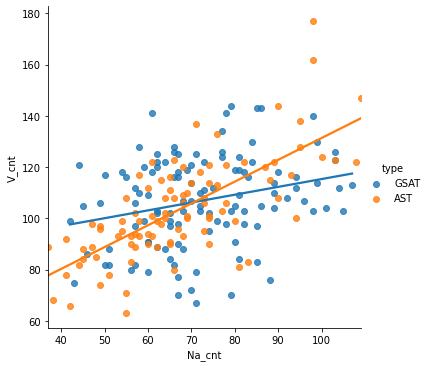

In [9]:
_ = sns.lmplot(x = xname, y = yname, data = vn_df, ci = None, hue = 'type')

由上述結果可以發現動詞普遍較名詞多的情況，而指考在這個現象的趨勢更為顯著。

#### 動詞對名詞簡單線性回歸

Let $y_1$ be the number of V words and $x_1$ be the number of N_a words in GSAT data set.<br>
The proposed model is,<br>
$y_1 = \beta_{10} + \beta_{11} x_1 + \epsilon_1$
<br><br>
Let $y_2$ be the number of V words and $x_2$ be the number of N_a words in AST data set.<br>
The proposed model is,<br>
$y_2 = \beta_{20} + \beta_{21} x_2 + \epsilon_2$<br><br>

In [10]:
vn_df_gsat = vn_df[vn_df.type == 'GSAT']
vn_df_ast = vn_df[vn_df.type == 'AST']

print("--- GSAT ---")
result1 = smf.ols(yname + '~ ' + xname, data = vn_df_gsat).fit()
print(result1.summary())

b1_1 = result1.params[1]
b0_1 = result1.params[0]
print(f"Estimated model: y1 = {b0_1:.4f} + {b1_1:.4f} x1")

print("\n\n--- AST ---")
result2 = smf.ols(yname + '~ ' + xname, data = vn_df_ast).fit()
print(result2.summary())

b1_2 = result2.params[1]
b0_2 = result2.params[0]
print(f"Estimated model: y2 = {b0_2:.4f} + {b1_2:.4f} x2")

--- GSAT ---
                            OLS Regression Results                            
Dep. Variable:                  V_cnt   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     8.212
Date:                Thu, 17 Jun 2021   Prob (F-statistic):            0.00496
Time:                        13:05:05   Log-Likelihood:                -488.55
No. Observations:                 115   AIC:                             981.1
Df Residuals:                     113   BIC:                             986.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.8264      7.885     10

對指考與學測的動詞與名詞分佈分別進行簡單線性迴歸分析：<br>
可以發現學測資料的 $R^2=0.068$ 顯示該模型解釋力不足。<br>
兩資料的模型F檢定與參數t檢定皆為顯著。<br>
兩者的Durbin-Watson檢定都無法拒絕虛無假設，不能證明兩資料有自回歸的現象。<br>
殘值分析等暫且忽略。<br>

#### 動詞對名詞比例Histogram

ratio mean =  1.5512316568733755


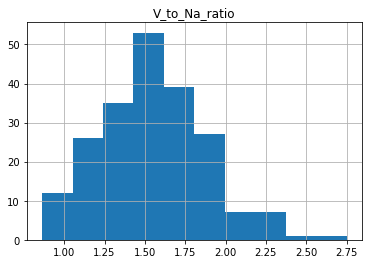

In [11]:
plot = all_list.hist(column = 'V_to_Na_ratio')
print("ratio mean = ",all_list.V_to_Na_ratio.mean())

畫出Histogram後可以發現比例的平均值為1.551左右，眾數也位在相近的位置，整體分佈呈現bell-shape。

### 單詞詞意計算函式

In [12]:
cwn = CwnBase()
    
def all_sense_tree (word, verbal = False):
    cnt = 0
    for i in range(len(word)):
        snese_tree = word[i].senses
        cnt += len(word[i].senses)
        if(verbal == True): print(snese_tree)
    
    if(verbal == True): print("total senses = ", cnt)
    return cnt

In [13]:
'''
_word = word_sentence_list[108][54]
word = cwn.find_lemma("^" + _word + "$")
print("word: ", _word)
all_sense_tree(word, verbal = True)
'''

'\n_word = word_sentence_list[108][54]\nword = cwn.find_lemma("^" + _word + "$")\nprint("word: ", _word)\nall_sense_tree(word, verbal = True)\n'

### 單詞詞意量計算

In [14]:
pun_set = {"COLONCATEGORY", "COMMACATEGORY", "DASHCATEGORY", "ETCCATEGORY", "EXCLAMATIONCATEGORY", "PARENTHESISCATEGORY",
          "PAUSECATEGORY", "PERIODCATEGORY", "QUESTIONCATEGORY", "SEMICOLONCATEGORY", "SPCHANGECATEGORY"}

all_senses_list = list()
all_senses_list_sum = list()

for i in range(all_list.shape[0]):
    senses_list = list()
    arr = pd.Series(word_sentence_list[i])
    ttl = 0
    for j in range(len(arr)):
        if(pos_sentence_list[i][j] not in pun_set):
            _word = arr[j]
            word = cwn.find_lemma("^" + _word + "$")
            sense_cnt = all_sense_tree(word)
            senses_list.append((arr[j], pos_sentence_list[i][j], sense_cnt))
            
    tp = sentence_list_type[i]
    year = sentence_list_year[i]
    all_senses_list.append((tp, year, senses_list))
    
    tmp_df = pd.DataFrame(senses_list, columns = ['tagged_word', 'CKIP_POS', 'sense_cnt'])
    words_cnt = tmp_df.shape[0]
    tmp_df_ = tmp_df[tmp_df['sense_cnt'] != 0]
    words_cnt_ = tmp_df_.shape[0]
    
    all_senses_list_sum.append((tp, year, words_cnt, tmp_df.sense_cnt.mean(), words_cnt_, tmp_df_.sense_cnt.mean()))

all_senses_df = pd.DataFrame(all_senses_list, columns = ['type', 'year', 'tagged_words'])
all_senses_df_sum = pd.DataFrame(all_senses_list_sum, columns = ['type', 'year', 'words_cnt', 'avg_sense_all', 'words_cnt_nonzero' ,'avg_sense_nonzero'])
all_senses_df_sum['zero_sense_ratio'] = all_senses_df_sum.words_cnt_nonzero.div(words_cnt)

all_senses_df_sum = all_senses_df_sum.assign(zero_sense_ratio = 1 - all_senses_df_sum['zero_sense_ratio'])
display(all_senses_df_sum.head())

,type,year,words_cnt,avg_sense_all,words_cnt_nonzero,avg_sense_nonzero,zero_sense_ratio
0,GSAT,105,399,5.100251,300,6.783333,0.353448
1,GSAT,107,268,5.313433,193,7.378238,0.584052
2,AST,101,345,6.191304,242,8.826446,0.478448
3,GSAT,101,345,6.011594,264,7.856061,0.431034
4,AST,103,394,5.581218,305,7.209836,0.342672


#### 平均詞意量Histogram

average sense from all words =  5.9117085939980205
average sense from non-zero-sensed words =  8.013096983316954


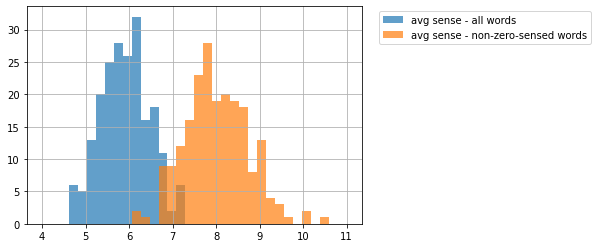

In [15]:
print("average sense from all words = ",all_senses_df_sum.avg_sense_all.mean())
print("average sense from non-zero-sensed words = ",all_senses_df_sum.avg_sense_nonzero.mean())

bins = np.linspace(4, 11, 35)

plt.hist(all_senses_df_sum.avg_sense_all, bins, alpha=0.7, label='avg sense - all words')
plt.hist(all_senses_df_sum.avg_sense_nonzero, bins, alpha=0.7, label='avg sense - non-zero-sensed words')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.7, 1))
plt.grid(True)
plt.show()

經過計算後可以得知在所有資料中，平均辭意為5.91；扣除辭意為0的單詞後平均辭意為8.01。

#### 冷僻詞使用分析

若我們假設詞意量為零之單詞是冷僻詞，經過計算可以得到每篇文章使用冷僻詞的比率：

ratio mean =  0.3614161969496021


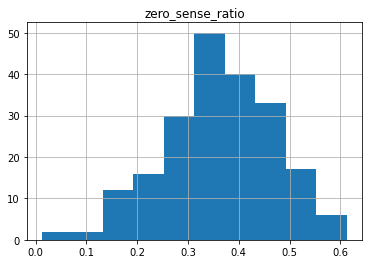

In [16]:
plot = all_senses_df_sum.hist(column = 'zero_sense_ratio')
print("ratio mean = ",all_senses_df_sum.zero_sense_ratio.mean())

可見在所有資料集中，冷僻字的使用平均比例為36.14%。

### 特定詞性單詞出現頻率

In [17]:
tmp_list = list()

for i in range(all_senses_df.shape[0]):
    tmp_list += all_senses_df.tagged_words[i]

senses_df = pd.DataFrame(tmp_list, columns = ['tagged_word', 'CKIP_POS', 'sense_cnt'])
senses_df_ = senses_df[senses_df['CKIP_POS'] != 'WHITESPACE']  #delete \n
senses_df_ = senses_df_[senses_df_['tagged_word'] != '。\n'] #delete 。\n

#senses_df_.head()

In [18]:
words_cnt_ = pd.DataFrame(senses_df_.value_counts())
print("Head of frequency of all words")
display(words_cnt_.head(10))

words_cnt_Na = senses_df_[senses_df_.CKIP_POS == 'Na']
words_cnt_Na = pd.DataFrame(words_cnt_Na.value_counts())
print("\n\nHead of frequency of Na(普通名詞) words")
display(words_cnt_Na.head(10))

words_cnt_Nb = senses_df_[senses_df_.CKIP_POS == 'Nb']
words_cnt_Nb = pd.DataFrame(words_cnt_Nb.value_counts())
print("\n\nHead of frequency of Nb(專有名稱) words")
display(words_cnt_Nb.head(10))

words_cnt_V = senses_df_[senses_df_.CKIP_POS != 'V_2']
words_cnt_V = words_cnt_V.loc[words_cnt_V['CKIP_POS'].str.contains('V')]
words_cnt_V = pd.DataFrame(words_cnt_V.value_counts())
print("\n\nHead of frequency of V words (excluding V_2)")
display(words_cnt_V.head(10))

words_cnt_VA = senses_df_[senses_df_.CKIP_POS == 'VA']
words_cnt_VA = pd.DataFrame(words_cnt_VA.value_counts())
print("\n\nHead of frequency of VA(動作不及物動詞) words")
display(words_cnt_VA.head(10))

Head of frequency of all words


,,,0
tagged_word,CKIP_POS,sense_cnt,
的,DE,16,7052
我,Nh,3,2705
一,Neu,10,1454
是,SHI,9,1362
在,P,10,1229
了,Di,5,836
不,D,3,699
著,Di,8,652
自己,Nh,5,601




Head of frequency of Na(普通名詞) words


,,,0
tagged_word,CKIP_POS,sense_cnt,
人,Na,11,481
心,Na,13,247
生命,Na,8,234
人生,Na,1,206
夢想,Na,0,107
學生,Na,2,86
逆境,Na,0,83
夢,Na,3,81
郵筒,Na,0,78




Head of frequency of Nb(專有名稱) words


,,,0
tagged_word,CKIP_POS,sense_cnt,
孔子,Nb,3,13
項羽,Nb,0,11
李白,Nb,2,11
蘇迪勒,Nb,0,10
蘇軾,Nb,0,8
柳宗元,Nb,0,8
柯麥隆,Nb,0,8
陶淵明,Nb,0,7
李安,Nb,0,7




Head of frequency of V words (excluding V_2)


,,,0
tagged_word,CKIP_POS,sense_cnt,
讓,VL,6,183
使,VL,13,181
說,VE,16,132
大,VH,28,120
面對,VC,2,119
沒有,VJ,6,107
想,VE,9,106
深,VH,17,88
看,VC,13,88




Head of frequency of VA(動作不及物動詞) words


,,,0
tagged_word,CKIP_POS,sense_cnt,
應變,VA,0,45
來,VA,19,44
通關,VA,0,39
度人,VA,0,36
存在,VA,3,32
笑,VA,2,30
歪腰,VA,0,29
站,VA,7,23
走,VA,20,21


以上我們統計了幾個特定詞性在所有資料集的單詞出現頻率。

+ 回到[R Project 研究結果頁面](https://derekdylu.github.io/LING5505-Final-Project-Group3/rmd.html)
+ 回到[入口頁面](https://derekdylu.github.io/LING5505-Final-Project-Group3/)